# Partition Clustering tests

In [1]:
import numpy as np
import scipy as sp
import sys
from sklearn.cluster import KMeans as sKMeans
from sklearn_extra.cluster import KMedoids
from math import atan2, cos, sin, sqrt
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import myvalidation
%autoreload 2

use distance of cities in the U. S. as reference dataset; convert coordinates to distances.

In [3]:
def distance(coord0,coord1,radius=6373.0):
    dlon = coord1[1] - coord0[1]
    dlat = coord1[0] - coord0[0]

    a = sin(dlat / 2)**2 + cos(coord0[0]) * cos(coord1[0]) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = radius * c

#### load data for US cities

In [4]:
import csv
ifile = open("places.txt")
places = csv.reader(ifile)
data = np.empty((300,2))
for i,city in enumerate(places):
    data[i] = city
nplaces = data.shape[0]
data.shape

(300, 2)

In [5]:
#convert to radians
coords = (np.pi/180.)*data

In [6]:
np.min(data[:,1]),np.max(data[:,1]),np.min(coords[:,1]),np.max(coords[:,1])

(33.429424, 43.5093982, 0.5834535158452129, 0.7593822541512942)

#### convert latitude / longitude to kilometric distances

In [7]:
distances = np.zeros((nplaces,nplaces))
for i in range(nplaces-1):
    for j in range(i+1,nplaces):
        distances[i,j] = distance(coords[i],coords[j])
        distances[j,i] = distances[i,j]

## settings

In [8]:
nclusters = 3
niter = 500
nrun = 10
conv=1e-5
metric = 'cityblock'

## KMeans

In [9]:
metric='euclidean'

### test KMeans

In [10]:
my_estimator = myclusters.KMeans(K=nclusters,niter=niter,nrun=nrun,\
                               boot='random',conv=1e-5,metric=metric)
my_estimator.do_clustering(X=data)
print(type(my_estimator).__name__)
clusters = my_estimator.clusters
my_estimator.inertia

KMeans


0.25756797823545885

In [11]:
my_estimator.centers

array([[ -80.84422658,   35.21709692],
       [ -80.52837166,   43.47624848],
       [-112.07160642,   33.46049013]])

### boot with kmeans++

In [12]:
my_estimator = myclusters.KMeans(K=nclusters,niter=niter,nrun=nrun,\
                               boot='kmeans++',conv=conv,metric=metric)
my_estimator.do_clustering(X=data)
print(type(my_estimator).__name__)
clusters = my_estimator.clusters
my_estimator.inertia

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


KMeans


0.25756797823545885

In [13]:
np.sort(my_estimator.centers)

array([[ -80.84422658,   35.21709692],
       [ -80.52837166,   43.47624848],
       [-112.07160642,   33.46049013]])

### SciKit Learn reference

In [14]:
estimator = sKMeans(n_clusters=nclusters,init='random',n_init=nrun,max_iter=niter, tol=conv)
estimator.fit_predict(data)
sk_centers = estimator.cluster_centers_
sk_clusters = np.copy(estimator.labels_)
print(sk_clusters)
sk_centers,estimator.inertia_

[1 1 1 1 2 2 0 1 1 0 1 0 2 1 0 0 0 1 0 2 2 2 2 0 1 2 1 2 1 1 2 0 1 1 1 0 2
 1 2 0 0 0 0 0 0 2 1 0 1 1 2 0 1 0 2 0 1 0 2 0 1 2 0 1 2 0 0 1 2 0 2 1 0 2
 1 1 1 0 2 1 1 0 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 0 1 1 1 2 1 1 0 0 1 2 1 1 2
 0 1 2 1 1 2 1 2 2 0 0 1 2 0 2 0 2 0 2 0 2 0 1 1 2 2 1 1 2 0 0 1 2 0 0 0 1
 0 0 2 0 0 2 2 2 2 2 0 0 2 1 2 1 0 2 2 2 2 2 2 1 1 0 0 1 2 0 0 2 1 2 0 0 2
 0 0 2 1 2 0 0 1 1 1 0 1 1 0 1 2 1 0 1 2 0 1 2 0 0 2 0 0 1 2 2 1 2 1 2 1 2
 2 2 0 0 0 1 0 1 1 0 0 2 2 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 2 2 2 2 0 1 0
 1 2 1 0 2 2 1 2 1 2 1 2 0 1 0 2 2 1 1 2 2 0 0 0 0 2 2 0 2 2 1 2 1 0 1 2 1
 1 1 2 1]


(array([[ -80.84422658,   35.21709692],
        [-112.07160642,   33.46049013],
        [ -80.52837166,   43.47624848]]),
 0.2575679782354589)

In [15]:
sk_centers,my_estimator.centers

(array([[ -80.84422658,   35.21709692],
        [-112.07160642,   33.46049013],
        [ -80.52837166,   43.47624848]]),
 array([[ -80.84422658,   35.21709692],
        [ -80.52837166,   43.47624848],
        [-112.07160642,   33.46049013]]))

In [16]:
estimator.inertia_- my_estimator.inertia

5.551115123125783e-17

## K-Medians

In [17]:
for i in range(3):
    my_estimator = myclusters.KMedians(K=nclusters,niter=niter,nrun=nrun,boot='random',conv=conv)
    my_estimator.do_clustering(X=data)
    print(my_estimator.inertia,"\n",my_estimator.centers)

0.2719391609339355 
 [[ -80.843388     35.2270246 ]
 [ -80.52527257   43.4723904 ]
 [-112.07281044   33.4561877 ]]
0.2719391609339355 
 [[ -80.843388     35.2270246 ]
 [ -80.52527257   43.4723904 ]
 [-112.07281044   33.4561877 ]]
0.2719391609339355 
 [[ -80.843388     35.2270246 ]
 [-112.07281044   33.4561877 ]
 [ -80.52527257   43.4723904 ]]


In [18]:
estimator.inertia_- my_estimator.inertia

-0.014371182698476592

## KMedoids

KM like solution to kmedoid problem

###  random boot

In [19]:
for i in range(3):
    my_estimator = myclusters.KMedoids(K=nclusters,niter=niter,nrun=nrun,boot='random',conv=conv,metric=metric,\
                                      random_state=0)
    my_estimator.do_clustering(X=data)
    medoids = set(list(my_estimator.clusters))
    print(medoids,my_estimator.inertia, my_estimator.final_iter,"\n",data[list(medoids)])

{177, 109, 119} 4.640240980864528 499 
 [[ -80.8428142   35.2265794]
 [-112.070655    33.4555253]
 [ -80.528095    43.474541 ]]
{177, 109, 119} 4.640240980864528 499 
 [[ -80.8428142   35.2265794]
 [-112.070655    33.4555253]
 [ -80.528095    43.474541 ]]
{177, 109, 119} 4.640240980864528 499 
 [[ -80.8428142   35.2265794]
 [-112.070655    33.4555253]
 [ -80.528095    43.474541 ]]


###  kmeans++ like

In [20]:
for i in range(3):
    my_estimator = myclusters.KMedoids(K=nclusters,niter=niter,nrun=nrun,boot='kmeanspp',conv=conv,metric=metric,\
                                      random_state=0)
    my_estimator.do_clustering(X=data)
    medoids = set(list(my_estimator.clusters))
    print(medoids,my_estimator.inertia, my_estimator.final_iter,"\n",data[list(medoids)])

{177, 109, 119} 4.640240980864528 499 
 [[ -80.8428142   35.2265794]
 [-112.070655    33.4555253]
 [ -80.528095    43.474541 ]]
{177, 109, 119} 4.640240980864528 499 
 [[ -80.8428142   35.2265794]
 [-112.070655    33.4555253]
 [ -80.528095    43.474541 ]]
{177, 109, 119} 4.640240980864528 499 
 [[ -80.8428142   35.2265794]
 [-112.070655    33.4555253]
 [ -80.528095    43.474541 ]]


### Compare with SKlearn-extra.KMedoids

In [21]:
for i in range(3):
    kmedoids = KMedoids(n_clusters=3, max_iter=niter, metric='cityblock',init='heuristic')
    kmedoids.fit_predict(data)
    print(kmedoids.medoid_indices_, "\n",kmedoids.inertia_)

[235 133  61] 
 5.648241902199715
[235 133  61] 
 5.648241902199715
[235 133  61] 
 5.648241902199715


In [22]:
kmedoids.cluster_centers_

array([[ -80.843784 ,   35.2275289],
       [-112.0737923,   33.4568607],
       [ -80.5243892,   43.4752375]])

In [23]:
data[kmedoids.medoid_indices_]

array([[ -80.843784 ,   35.2275289],
       [-112.0737923,   33.4568607],
       [ -80.5243892,   43.4752375]])

## GROMOS

In [24]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(data,metric='cityblock'))
bins = np.histogram_bin_edges(D.ravel(), bins='fd')
bins

array([ 0.        ,  1.43586854,  2.87173708,  4.30760562,  5.74347417,
        7.17934271,  8.61521125, 10.05107979, 11.48694833, 12.92281687,
       14.35868541, 15.79455396, 17.2304225 , 18.66629104, 20.10215958,
       21.53802812, 22.97389666, 24.4097652 , 25.84563374, 27.28150229,
       28.71737083, 30.15323937, 31.58910791, 33.02497645, 34.46084499,
       35.89671353, 37.33258208, 38.76845062, 40.20431916, 41.6401877 ])

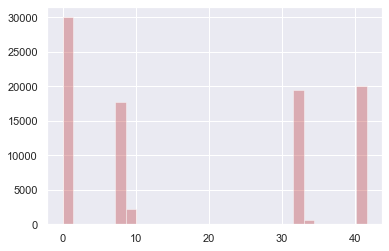

In [25]:
sns.set()
sns.distplot(D.ravel(),bins=bins,kde=False,color='r')

In [26]:
my_estimator = myclusters.gromos_clustering(C=5. , scaldist=False , metric=metric)
cost, ncl, nn = my_estimator.do_clustering(X=data)
cost, ncl, nn

(19.35402705244319, 3, 0)

In [27]:
data[list(my_estimator.medoids)]

array([[-112.0693184 ,   33.4657177 ],
       [ -80.81740634,   35.05785306],
       [ -80.5194703 ,   43.476998  ]])